# Forecasting competition

To help make it easier for you to participate in our motion forecasting challenge, we provide an example notebook for the task

## A simple baseline

Let's say we have our (very very naive) prediction function;

In [51]:
def prediction(trajectory,num_points=30,avg_points=1):
    #a simple prediction function that predict straight line with constant velocity
    vx = []
    vy = []
    for i in range(1,avg_points+1,1):
        vx.append(trajectory[-i,0] - trajectory[-(1+i),0])
        vy.append(trajectory[-i,1] - trajectory[-(1+i),1])
        
    vx = np.mean(vx)
    vy = np.mean(vy)
    
    current_traj = trajectory[-1]
    results = np.zeros((len(trajectory)+num_points,2))
    
    results[0:len(trajectory)] = trajectory
    
    for i in range(num_points):
        results[len(trajectory)+i] = np.array([current_traj[0]+vx,current_traj[1]+vy])
        current_traj = results[len(trajectory)+i]
    return results

Let's try that on our argoverse forecasting test set

In [36]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

##set root_dir to the correct path to your dataset folder
root_dir = '/Users/psangkloy/Downloads/data/test_obs/data/'

afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 78143


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [61]:
afl = afl[111]
predict_traj = prediction(afl.agent_traj,avg_points=5)

Here is an example of our prediction, initial trajectory in blue and the predicted trajectory in red

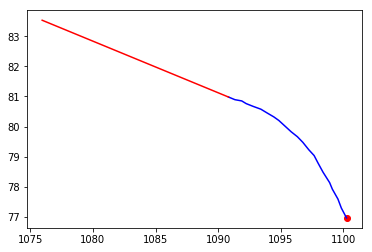

In [62]:
plt.plot(predict_traj[0,0],predict_traj[0,1],'-o',c='r') #starting point here
plt.plot(predict_traj[:21,0],predict_traj[:21,1],'-',c='b')
plt.plot(predict_traj[20:,0],predict_traj[20:,1],'-',c='r')
plt.show()

But to submit to our challenge, we need multiple guesses (9 to be exact). 

So let's create multiple predicted trajectories

In [63]:
def get_multiple_prediction(afl):
    predict_traj = []
    for i in range(9,0,-1):
        predict_traj.append(prediction(afl.agent_traj,avg_points=(i)))
    return np.array(predict_traj)
predict_traj = get_multiple_prediction(afl)

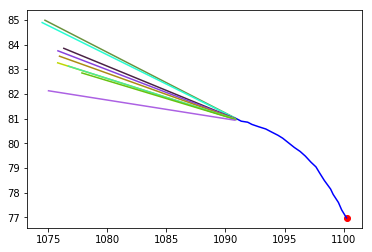

In [64]:
plt.plot(predict_traj[0,0,0],predict_traj[0,0,1],'-o',c='r') #starting point here
plt.plot(predict_traj[0,:21,0],predict_traj[0,:21,1],'-',c='b')

for i in range(9):
    plt.plot(predict_traj[i,20:,0],predict_traj[i,20:,1],'-',c=np.random.rand(3,))
plt.show()

## Compute all the results

In [65]:
output_all = {}
counter = 1
for data in afl:
    print('\r'+str(counter)+'/'+str(len(afl)),end="")
    predict_traj = get_multiple_prediction(data)
    seq_id = int(data.current_seq.name[:-4])
    output_all[seq_id] = predict_traj[:,20:,:]
    counter += 1
    

78143/78143

## Generate the result file

To participate in our competition, you need to upload the result file to our evaluation server on EvalAI https://evalai.cloudcv.org/. Make sure that your results is in the right format, and then call our helper function `generate_forecasting_h5`

In [ ]:
from argoverse.evaluation.competition_util import generate_forecasting_h5

output_path = 'competition_files/'

generate_forecasting_h5(output_all, output_path) #this might take awhile

17679/78143

You are all set!! 

Simply upload `competition_files/argoverse_forecasting_baseline.h5` to our evaluation server on https://evalai.cloudcv.org/ and see how well you did it